# Run motion analyses on ADHD data

In [1]:
%matplotlib inline
import ddmra
import generate_ddmra_plots as gdp
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nibabel as nib
import pandas as pd
from nilearn import datasets

In [2]:
%%time
# Constants
n_subjects = 40  # 31
fd_thresh = 0.2
data = datasets.fetch_adhd(n_subjects=n_subjects)
n_iters = 10000

# Prepare data
imgs = []
fd_all = []
for i in range(n_subjects):
    func = data.func[i]
    imgs.append(nib.load(func))
    conf = data.confounds[i]
    df = pd.read_csv(conf, sep='\t')
    motion = df[['motion-pitch', 'motion-roll', 'motion-yaw',
                 'motion-x', 'motion-y', 'motion-z']].values
    fd_all.append(ddmra.get_fd_power(
        motion, order=['p', 'r', 'ya', 'x', 'y', 'z'], unit='deg'))

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/nilearn/datasets/func.py:501: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


CPU times: user 175 ms, sys: 35.5 ms, total: 210 ms
Wall time: 232 ms


CPU times: user 6min 10s, sys: 26.5 s, total: 6min 36s
Wall time: 6min 50s


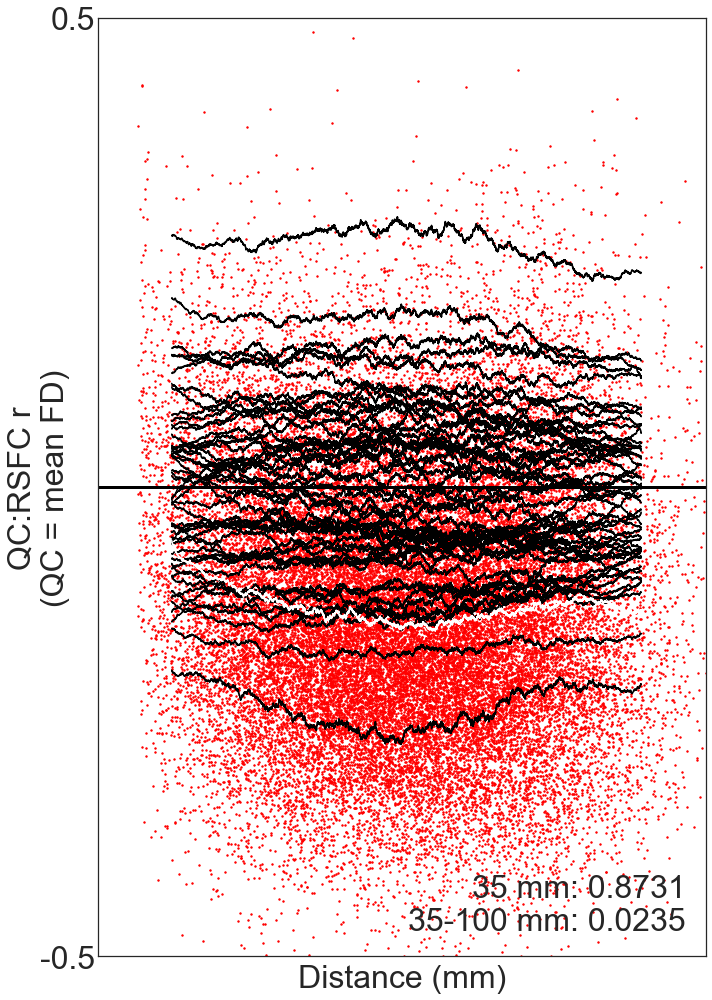

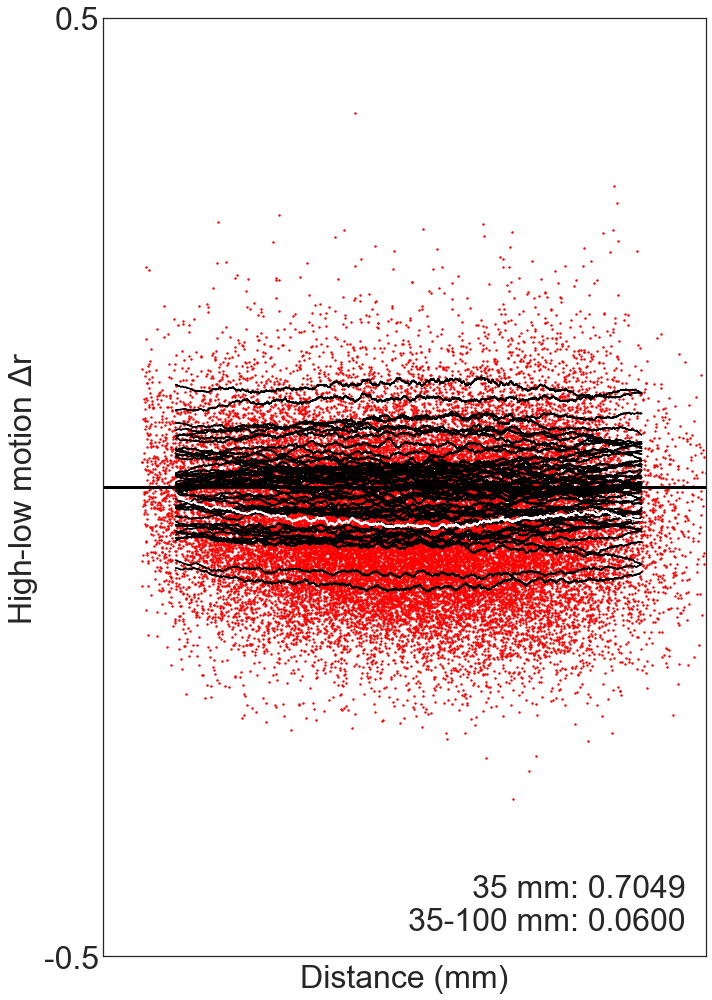

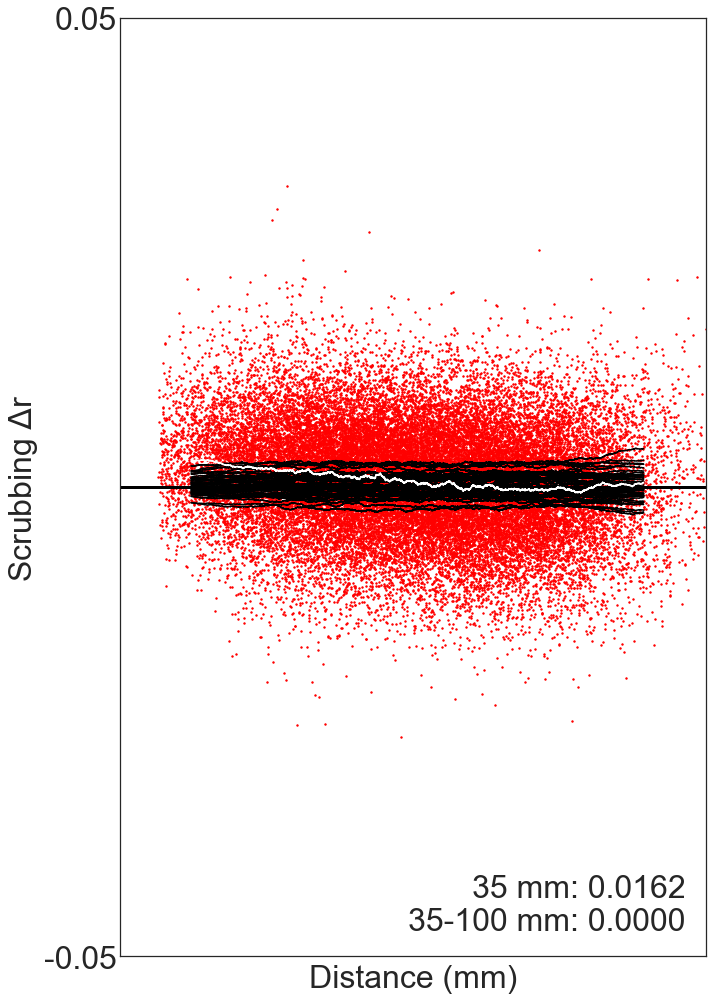

In [3]:
%%time
gdp.main(imgs, fd_all, out_dir='sandbox/', n_iters=n_iters, fd_thresh=fd_thresh)